In [67]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

with np.load('sample_data/prediction-challenge-02-data.npz') as fh:
    data_x = fh['x_train']
    data_y = fh['y_train']
    test_x = fh['x_test']

# TRAINING DATA: INPUT (x) AND OUTPUT (y)
# 1. INDEX: IMAGE SERIAL NUMBER (6000)
# 2/3. INDEX: PIXEL VALUE (32 x 32)
# 4. INDEX: COLOR CHANNELS (3)
print(x_train.shape, x_train.dtype)
print(y_train.shape, y_train.dtype)

# TEST DATA: INPUT (x) ONLY
print(x_test.shape, x_test.dtype)

#Labels {0=cat,1=dog, 2=frog} 

x_train = data_x
y_train = data_y
x_test = test_x
#x_train = torch.from_numpy(data_x)
#y_train = torch.from_numpy(data_y)
#x_test = torch.from_numpy(test_x)

(3000, 32, 32, 3) float32
(3000,) float64
(300, 32, 32, 3) float32


In [68]:
y_train_category = np_utils.to_categorical(y_train)

print(y_train_category[0])
print(y_train_category.shape)
print(y_train_category.shape[1])
num_classes = y_train_category.shape[1]

[1. 0. 0.]
(3000, 3)
3


In [69]:
# generate random integer values
from random import seed
from random import randint
import time
# seed random number generator
seed(time.time()*1000)
# generate some integers
randoms = []

for _ in range(9):
  value = randint(0, x_train.shape[0]-1)
  print(value)
  randoms.append(value)

2088
112
2728
2070
1896
844
1032
1601
1583


2.0
0.0
0.0
0.0
2.0
0.0
1.0
1.0
2.0


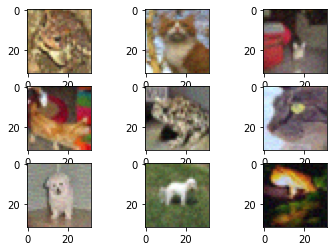

In [70]:
#Display Data
for i in range(0, 9):
  print(y_train[randoms[i]])
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[randoms[i]])
# show the plot
plt.show()

In [71]:
# Model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
batch_size = 32
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)              

In [72]:
#Build Testset from Trainingset
from sklearn.model_selection import train_test_split
# Split into training and testing data
random_state = 42
TrainingX, TestX, TrainingY, TestY = train_test_split(x_train, y_train_category, test_size=0.20, random_state=random_state)

#dataX = torch.split(x_train, [2600,400])
#dataY = torch.split(y_train, [2600,400])

#TrainingX = dataX[0]
#TestX = dataX[1]
#TrainingY = dataY[0]
#TestY = dataY[1]



# TRAIN MODEL ON x_train, y_train
model.fit(TrainingX, TrainingY, validation_data=(TestX,TestY), epochs=epochs, batch_size=batch_size)

Epoch 1/25
75/75 [==============================] - 12s 151ms/step - loss: 1.1208 - accuracy: 0.3556 - val_loss: 1.0957 - val_accuracy: 0.3350
Epoch 2/25
75/75 [==============================] - 11s 148ms/step - loss: 1.0408 - accuracy: 0.4477 - val_loss: 1.0101 - val_accuracy: 0.5117
Epoch 3/25
75/75 [==============================] - 11s 148ms/step - loss: 0.9827 - accuracy: 0.5053 - val_loss: 1.0098 - val_accuracy: 0.5150
Epoch 4/25
75/75 [==============================] - 11s 148ms/step - loss: 0.9899 - accuracy: 0.5056 - val_loss: 0.9576 - val_accuracy: 0.5317
Epoch 5/25
75/75 [==============================] - 11s 148ms/step - loss: 0.9522 - accuracy: 0.5426 - val_loss: 0.9800 - val_accuracy: 0.5050
Epoch 6/25
75/75 [==============================] - 11s 148ms/step - loss: 0.9500 - accuracy: 0.5230 - val_loss: 0.9387 - val_accuracy: 0.5317
Epoch 7/25
75/75 [==============================] - 11s 148ms/step - loss: 0.8973 - accuracy: 0.5691 - val_loss: 0.9118 - val_accuracy: 0.5450

In [73]:
#evaluate model
scores = model.evaluate(TestX, TestY, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 60.67%


In [86]:
# PREDICT prediction FROM x_test
model_predictions = model.predict(x_test)



y_classes = [np.argmax(y, axis=None, out=None) for y in model_predictions]

print(y_classes)
pred = y_classes

[2, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 0, 2, 2, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 1, 2, 0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1, 2, 2, 1, 0, 1, 2, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 2]


Test-samples:  300
Predictions:  300


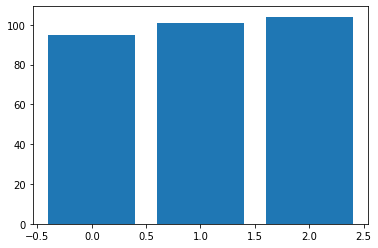

In [88]:

print("Test-samples: " , x_test.shape[0])
print("Predictions: ", len(pred))

values, counts = np.unique(pred, return_counts=True)
#df = pd.DataFrame(data=counts, columns=values)

plt.bar(values, counts)

prediction = np.array(pred)

In [89]:
# MAKE SURE THAT YOU HAVE THE RIGHT FORMAT
assert prediction.ndim == 1
assert prediction.shape[0] == 300

# AND SAVE EXACTLY AS SHOWN BELOW
np.save('sample_data/prediction.npy', prediction.astype(int))

# MAKE SURE THAT THE FILE HAS THE CORRECT FORMAT
def validate_prediction_format():
    loaded = np.load('sample_data/prediction.npy')
    assert loaded.shape == (300, )
    assert loaded.dtype == int
    assert (loaded <= 2).all()
    assert (loaded >= 0).all()
validate_prediction_format()